# Data Exploration and Cleaning:
    -  Univariable study of target and features (Continuous & Categorical features, separately)
    -  Multivariate study of target and features
    -  Testing the statistical assumptions: Normality, Homoscedasticity, etc.
    -  Basic cleaning: Outliers, Missing data, Duplicate values.
    -  Chi-square test to examine dependency of target on categorical features (helpful for Feature Selection, if required)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('C:/Users/rhash/Documents/Datasets/Turkiye student evaluation/turkiye-student-evaluation_generic.csv', sep=',') 

df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 33 columns):
instr         5820 non-null int64
class         5820 non-null int64
nb.repeat     5820 non-null int64
attendance    5820 non-null int64
difficulty    5820 non-null int64
Q1            5820 non-null int64
Q2            5820 non-null int64
Q3            5820 non-null int64
Q4            5820 non-null int64
Q5            5820 non-null int64
Q6            5820 non-null int64
Q7            5820 non-null int64
Q8            5820 non-null int64
Q9            5820 non-null int64
Q10           5820 non-null int64
Q11           5820 non-null int64
Q12           5820 non-null int64
Q13           5820 non-null int64
Q14           5820 non-null int64
Q15           5820 non-null int64
Q16           5820 non-null int64
Q17           5820 non-null int64
Q18           5820 non-null int64
Q19           5820 non-null int64
Q20           5820 non-null int64
Q21           5820 non-null int64
Q22      

In [4]:
# Imbalanced dataset:
df['nb.repeat'].value_counts()

1    4909
2     576
3     335
Name: nb.repeat, dtype: int64

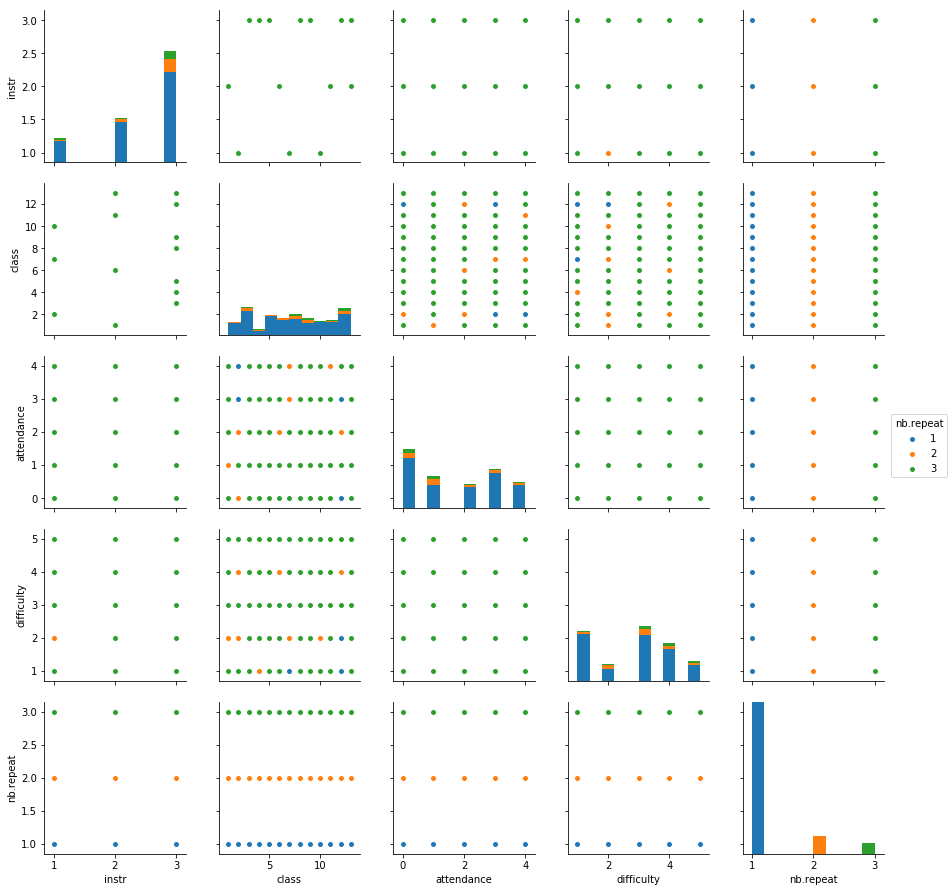

In [5]:
# Multi-variable analysis of Features:
sns.pairplot(df[['instr', 'class', 'attendance',  'difficulty', 'nb.repeat']], hue='nb.repeat')

______________________________________________________________________
variable name:  instr 

Value counts: 
3    3601
2    1444
1     775
Name: instr, dtype: int64



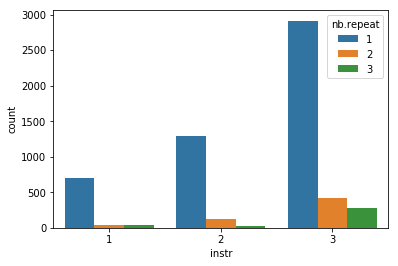

______________________________________________________________________
variable name:  class 

Value counts: 
3     904
13    841
5     656
9     571
6     558
8     500
11    484
10    448
1     303
7     187
4     187
2     140
12     41
Name: class, dtype: int64



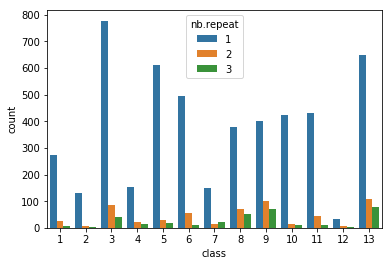

______________________________________________________________________
variable name:  attendance 

Value counts: 
0    1902
3    1252
1    1028
4     846
2     792
Name: attendance, dtype: int64



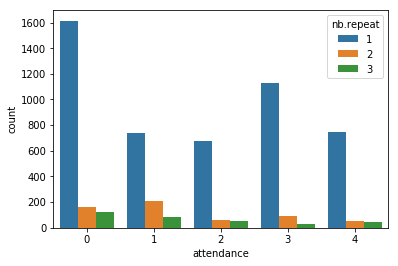

______________________________________________________________________
variable name:  difficulty 

Value counts: 
3    1774
1    1620
4    1225
5     652
2     549
Name: difficulty, dtype: int64



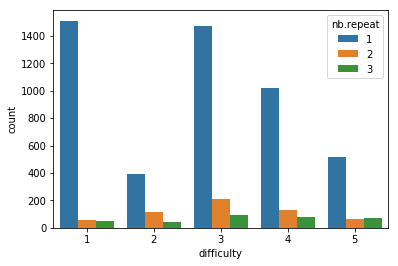

______________________________________________________________________
variable name:  Q1 

Value counts: 
3    1563
4    1292
1    1243
2     886
5     836
Name: Q1, dtype: int64



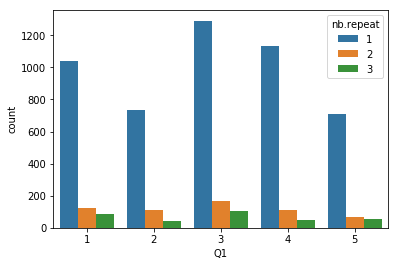

______________________________________________________________________
variable name:  Q2 

Value counts: 
3    1681
4    1504
1     986
5     849
2     800
Name: Q2, dtype: int64



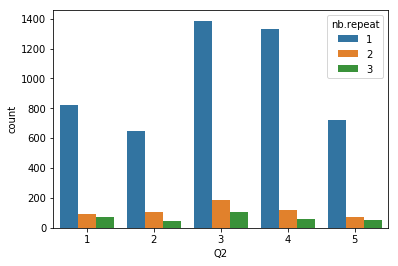

______________________________________________________________________
variable name:  Q3 

Value counts: 
3    1746
4    1639
5     897
1     855
2     683
Name: Q3, dtype: int64



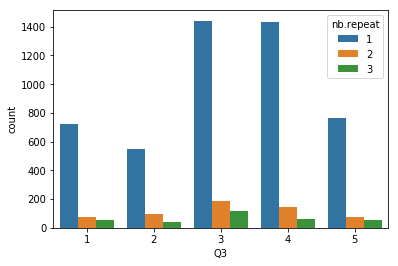

______________________________________________________________________
variable name:  Q4 

Value counts: 
3    1674
4    1505
1     970
5     862
2     809
Name: Q4, dtype: int64



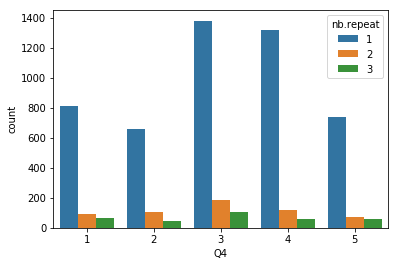

______________________________________________________________________
variable name:  Q5 

Value counts: 
3    1699
4    1497
1     930
5     891
2     803
Name: Q5, dtype: int64



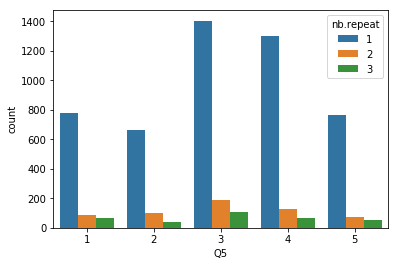

______________________________________________________________________
variable name:  Q6 

Value counts: 
3    1709
4    1509
1     946
5     888
2     768
Name: Q6, dtype: int64



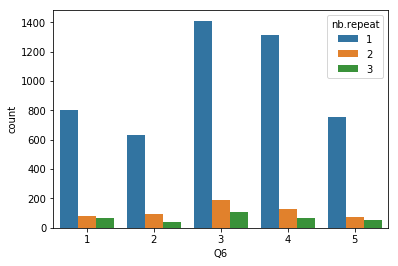

______________________________________________________________________
variable name:  Q7 

Value counts: 
3    1713
4    1471
1     972
5     841
2     823
Name: Q7, dtype: int64



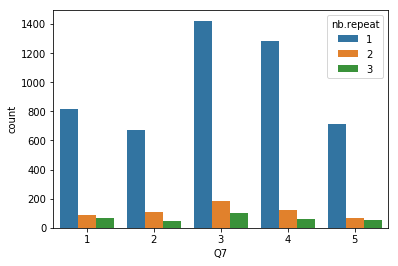

______________________________________________________________________
variable name:  Q8 

Value counts: 
3    1711
4    1377
1     972
2     903
5     857
Name: Q8, dtype: int64



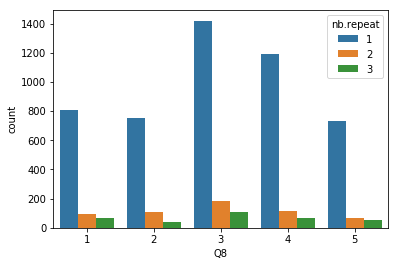

______________________________________________________________________
variable name:  Q9 

Value counts: 
3    1777
4    1521
5     949
1     880
2     693
Name: Q9, dtype: int64



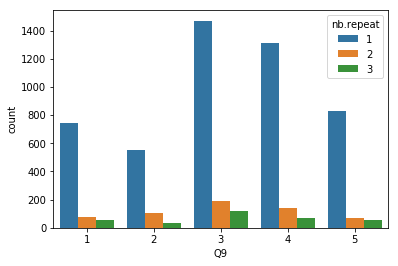

______________________________________________________________________
variable name:  Q10 

Value counts: 
3    1771
4    1441
1     942
5     879
2     787
Name: Q10, dtype: int64



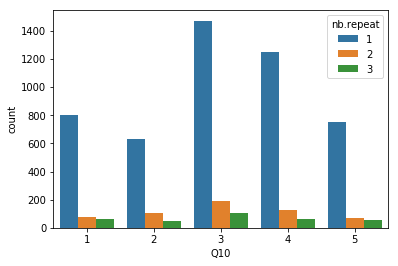

______________________________________________________________________
variable name:  Q11 

Value counts: 
3    1660
4    1548
5    1017
1     917
2     678
Name: Q11, dtype: int64



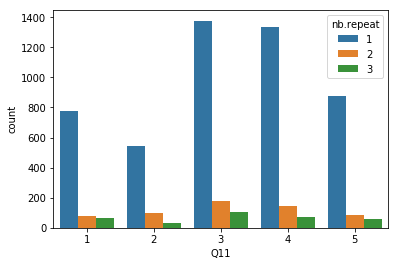

______________________________________________________________________
variable name:  Q12 

Value counts: 
3    1696
4    1367
1    1052
5     883
2     822
Name: Q12, dtype: int64



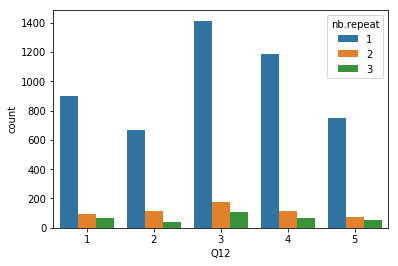

______________________________________________________________________
variable name:  Q13 

Value counts: 
4    1708
3    1655
5     997
1     829
2     631
Name: Q13, dtype: int64



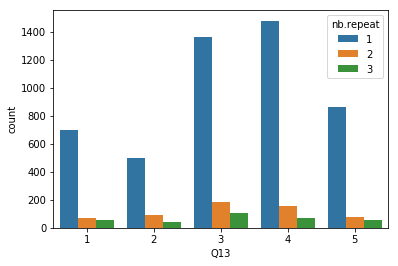

______________________________________________________________________
variable name:  Q14 

Value counts: 
4    1789
3    1620
5    1034
1     787
2     590
Name: Q14, dtype: int64



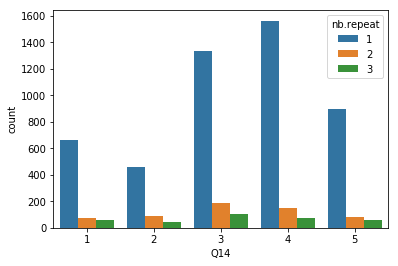

______________________________________________________________________
variable name:  Q15 

Value counts: 
4    1770
3    1659
5    1028
1     791
2     572
Name: Q15, dtype: int64



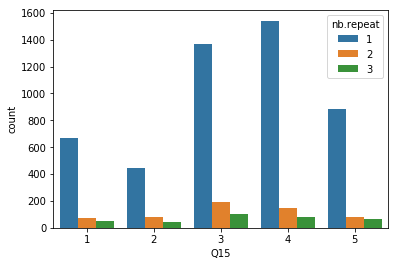

______________________________________________________________________
variable name:  Q16 

Value counts: 
3    1681
4    1556
5     977
1     917
2     689
Name: Q16, dtype: int64



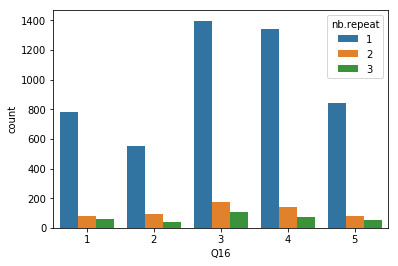

______________________________________________________________________
variable name:  Q17 

Value counts: 
4    1854
3    1487
5    1231
1     749
2     499
Name: Q17, dtype: int64



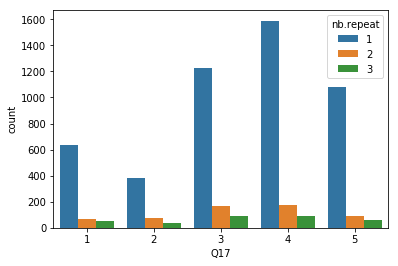

______________________________________________________________________
variable name:  Q18 

Value counts: 
3    1659
4    1635
5    1018
1     868
2     640
Name: Q18, dtype: int64



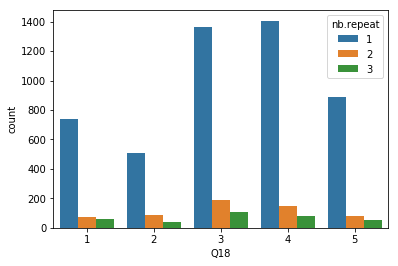

______________________________________________________________________
variable name:  Q19 

Value counts: 
3    1678
4    1669
5    1050
1     823
2     600
Name: Q19, dtype: int64



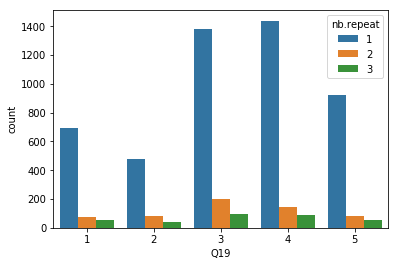

______________________________________________________________________
variable name:  Q20 

Value counts: 
4    1670
3    1634
5    1108
1     817
2     591
Name: Q20, dtype: int64



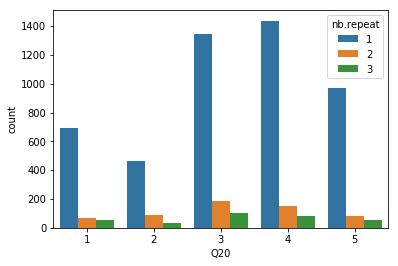

______________________________________________________________________
variable name:  Q21 

Value counts: 
4    1706
3    1621
5    1122
1     790
2     581
Name: Q21, dtype: int64



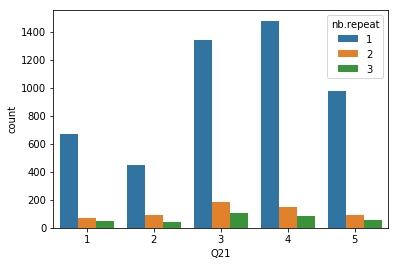

______________________________________________________________________
variable name:  Q22 

Value counts: 
4    1718
3    1620
5    1132
1     784
2     566
Name: Q22, dtype: int64



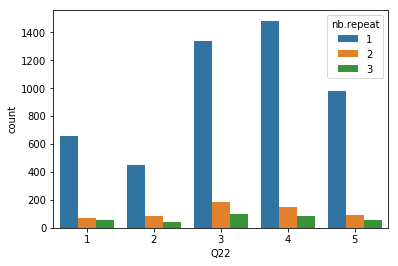

______________________________________________________________________
variable name:  Q23 

Value counts: 
3    1733
4    1556
5    1002
1     856
2     673
Name: Q23, dtype: int64



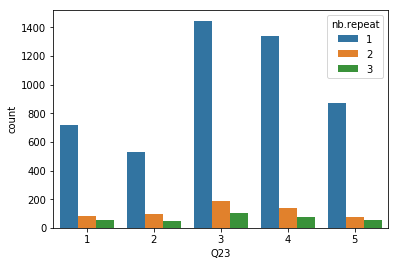

______________________________________________________________________
variable name:  Q24 

Value counts: 
3    1720
4    1530
5     964
1     881
2     725
Name: Q24, dtype: int64



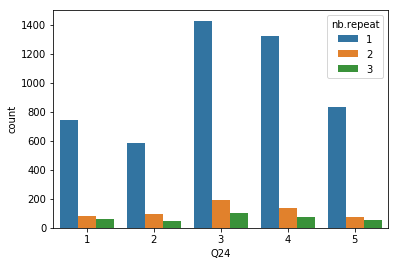

______________________________________________________________________
variable name:  Q25 

Value counts: 
4    1744
3    1642
5    1093
1     770
2     571
Name: Q25, dtype: int64



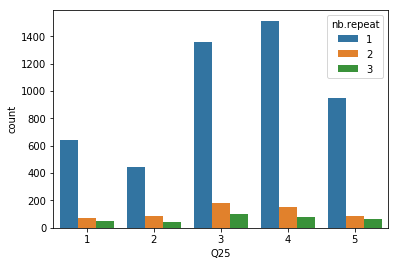

______________________________________________________________________
variable name:  Q26 

Value counts: 
3    1699
4    1630
5    1002
1     852
2     637
Name: Q26, dtype: int64



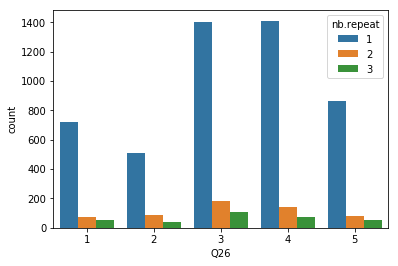

______________________________________________________________________
variable name:  Q27 

Value counts: 
3    1633
4    1574
5     957
1     931
2     725
Name: Q27, dtype: int64



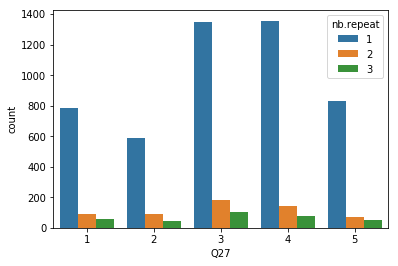

______________________________________________________________________
variable name:  Q28 

Value counts: 
4    1695
3    1612
5    1141
1     812
2     560
Name: Q28, dtype: int64



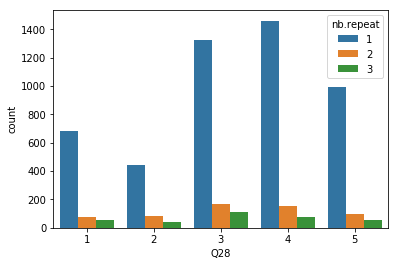

In [6]:
# Multivariate analysis of Categorical Features: Value Counts and Success rate for different classes of a Categorical feature

for i in df.drop('nb.repeat', axis=1).columns:
    print('_'*70 )
    print('variable name: ', i, '\n')
    print('Value counts: \n', df[i].value_counts(), '\n', sep='')
    
    sns.countplot(x=i,  hue="nb.repeat", data=df)
    plt.show()

______________________________________________________________________
variable name:  instr 

Chi-square statistic=  86.22138105190079
p_value=  1.8934986226245952e-19


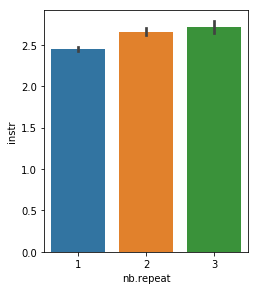

______________________________________________________________________
variable name:  class 

Chi-square statistic=  257.6609171810437
p_value=  3.448308024157376e-48


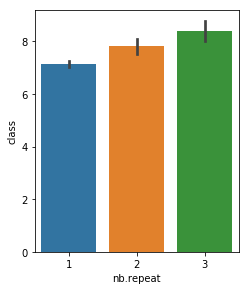

______________________________________________________________________
variable name:  attendance 

Chi-square statistic=  163.363659846094
p_value=  2.776144531401961e-34


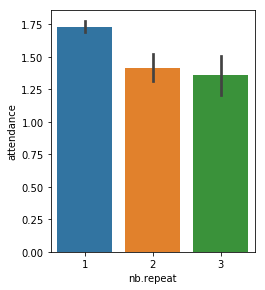

______________________________________________________________________
variable name:  difficulty 

Chi-square statistic=  179.61922394127586
p_value=  9.001459238891003e-38


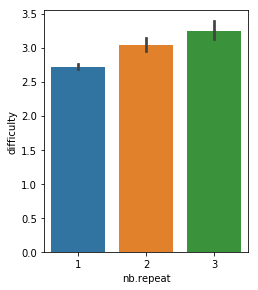

______________________________________________________________________
variable name:  Q1 

Chi-square statistic=  16.432859276294263
p_value=  0.0024900763245199334


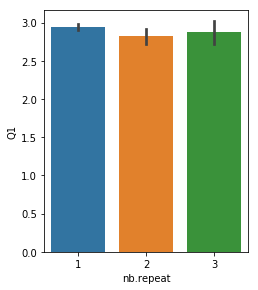

______________________________________________________________________
variable name:  Q2 

Chi-square statistic=  30.27897378312618
p_value=  4.294317072833267e-06


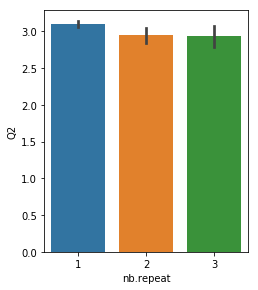

______________________________________________________________________
variable name:  Q3 

Chi-square statistic=  27.013420255672585
p_value=  1.9755101068504158e-05


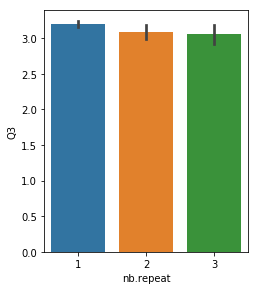

______________________________________________________________________
variable name:  Q4 

Chi-square statistic=  24.58822960337033
p_value=  6.086858509066478e-05


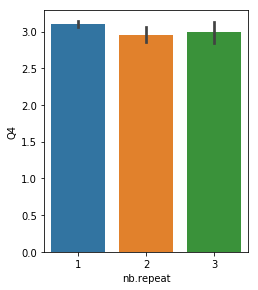

______________________________________________________________________
variable name:  Q5 

Chi-square statistic=  15.246125573920281
p_value=  0.004217037322880663


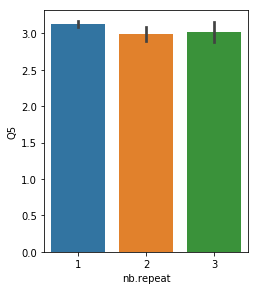

______________________________________________________________________
variable name:  Q6 

Chi-square statistic=  16.951524279767728
p_value=  0.0019753198285700577


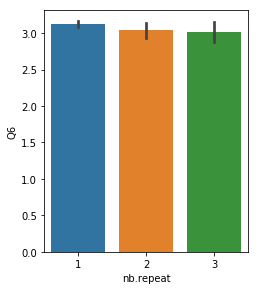

______________________________________________________________________
variable name:  Q7 

Chi-square statistic=  19.433673835607475
p_value=  0.0006457998904086961


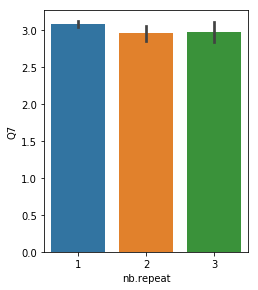

______________________________________________________________________
variable name:  Q8 

Chi-square statistic=  10.964192252310951
p_value=  0.02696940531780294


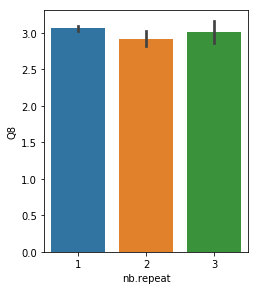

______________________________________________________________________
variable name:  Q9 

Chi-square statistic=  23.641597955451935
p_value=  9.42339342153193e-05


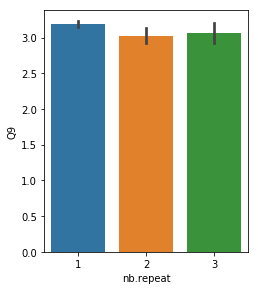

______________________________________________________________________
variable name:  Q10 

Chi-square statistic=  18.256832989670677
p_value=  0.001099311166974949


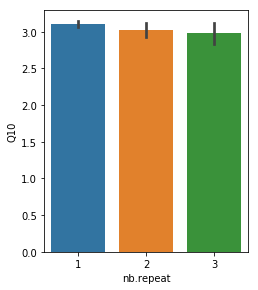

______________________________________________________________________
variable name:  Q11 

Chi-square statistic=  18.38330572368949
p_value=  0.0010383900195217774


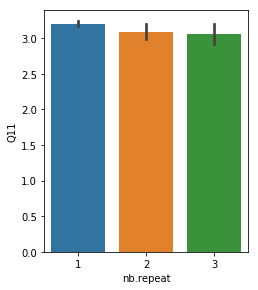

______________________________________________________________________
variable name:  Q12 

Chi-square statistic=  15.603829759125345
p_value=  0.00359955309393543


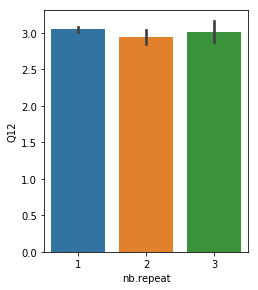

______________________________________________________________________
variable name:  Q13 

Chi-square statistic=  28.292885233651102
p_value=  1.0878992486010016e-05


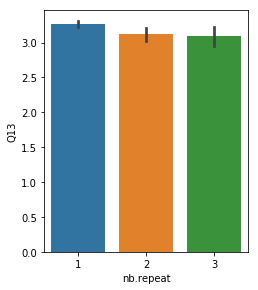

______________________________________________________________________
variable name:  Q14 

Chi-square statistic=  38.8616034273349
p_value=  7.440385636207288e-08


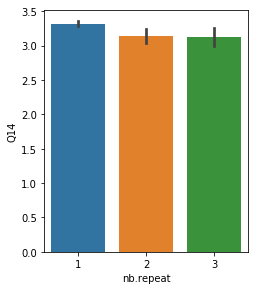

______________________________________________________________________
variable name:  Q15 

Chi-square statistic=  33.075165200368616
p_value=  1.1528926282178714e-06


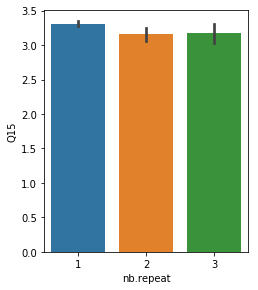

______________________________________________________________________
variable name:  Q16 

Chi-square statistic=  17.03905791505644
p_value=  0.0018994639025038456


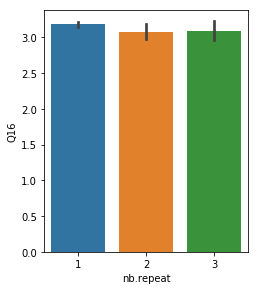

______________________________________________________________________
variable name:  Q17 

Chi-square statistic=  36.862470667178414
p_value=  1.9227225134353957e-07


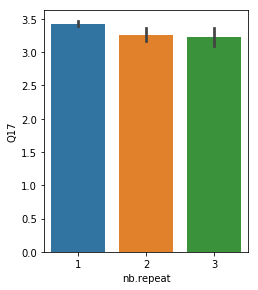

______________________________________________________________________
variable name:  Q18 

Chi-square statistic=  27.08517232355522
p_value=  1.9106062972520014e-05


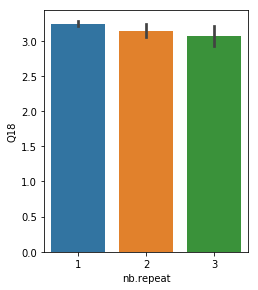

______________________________________________________________________
variable name:  Q19 

Chi-square statistic=  29.41425111430682
p_value=  6.439812774085334e-06


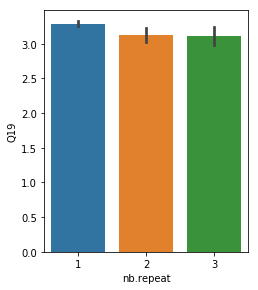

______________________________________________________________________
variable name:  Q20 

Chi-square statistic=  29.982731969503323
p_value=  4.934214661999146e-06


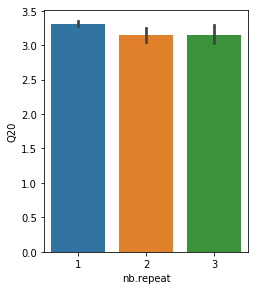

______________________________________________________________________
variable name:  Q21 

Chi-square statistic=  36.541463333821014
p_value=  2.2388255827802017e-07


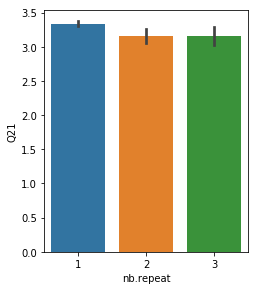

______________________________________________________________________
variable name:  Q22 

Chi-square statistic=  26.640903707930146
p_value=  2.3494055203447437e-05


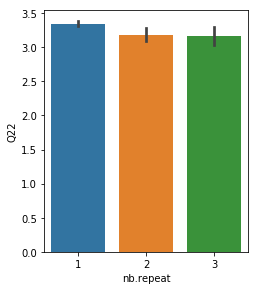

______________________________________________________________________
variable name:  Q23 

Chi-square statistic=  28.719738474132427
p_value=  8.912007594672255e-06


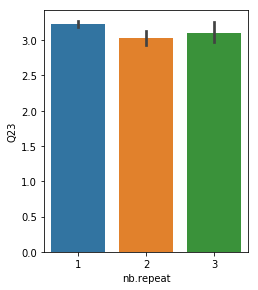

______________________________________________________________________
variable name:  Q24 

Chi-square statistic=  20.6050502569647
p_value=  0.00037918021482820987


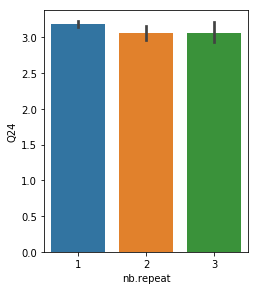

______________________________________________________________________
variable name:  Q25 

Chi-square statistic=  35.28451153940012
p_value=  4.060356188330697e-07


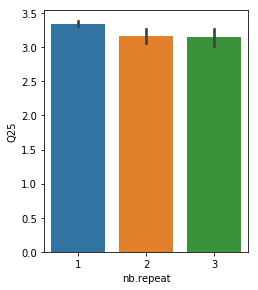

______________________________________________________________________
variable name:  Q26 

Chi-square statistic=  22.82141420711996
p_value=  0.00013746413277425528


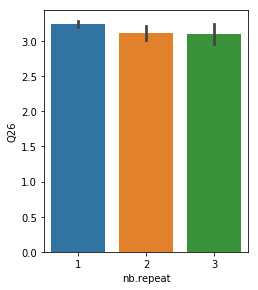

______________________________________________________________________
variable name:  Q27 

Chi-square statistic=  18.298718780197365
p_value=  0.0010787537914763088


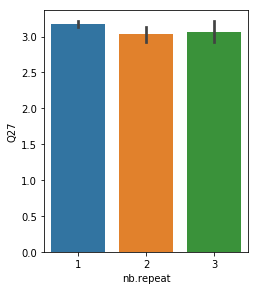

______________________________________________________________________
variable name:  Q28 

Chi-square statistic=  27.816634210691717
p_value=  1.3586989831281393e-05


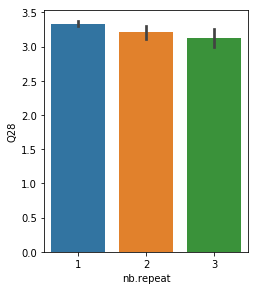

In [7]:
# Multivariable analysis of variables: Chi-square test for checking
# the dependency of Categorical target and Categorical features
F={}
for c in df.drop('nb.repeat', axis=1).columns:
    print('_'*70 )
    print('variable name: ', c, '\n')
    
    c1=df[df['nb.repeat']==1][c].value_counts().sort_index().values
    c2=df[(df['nb.repeat']==2) | (df['nb.repeat']==3)][c].value_counts().sort_index().values
    
    obs = np.array([c1, c2])
    g, p, dof, expctd = stats.chi2_contingency(obs)
    
    F[c] = round(g,2)
    print('Chi-square statistic= ', g)
    print('p_value= ', p)
    
    fig = plt.figure(figsize=(9, 4))
    
    ax1 = fig.add_subplot(121)
    sns.barplot(x='nb.repeat', y=c, data=df)

    
    fig.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.7)
    
    plt.show()

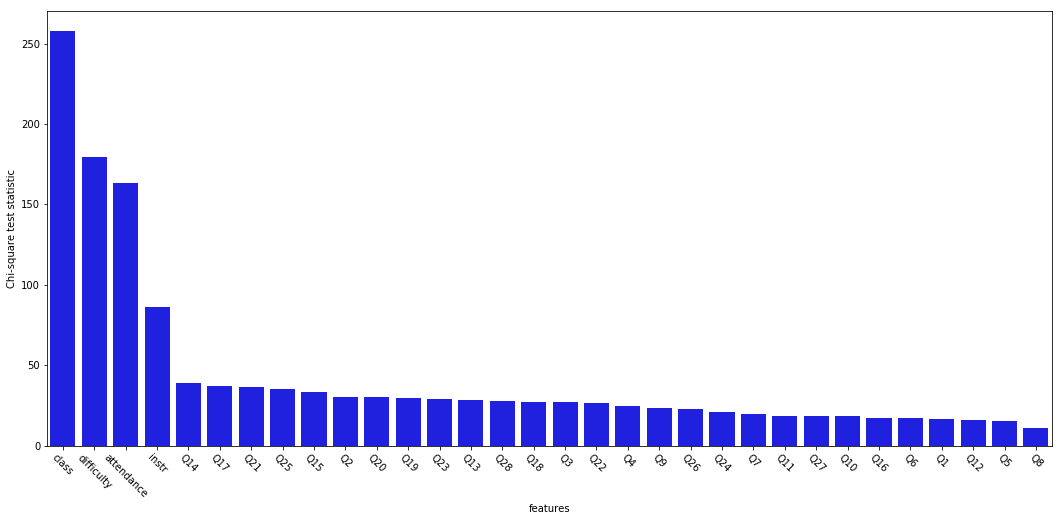

In [8]:
# Sort and plot Categorical Features based on their Chi-square statistics (i.e. their dependency with Target): 
# Helpful for Feature Selection
F_sorted=sorted(F,key=lambda i: F[i], reverse= True)
feature_df = pd.DataFrame([F[i] for i in F_sorted], index=[i for i in F_sorted]).reset_index()
feature_df.columns=['features', 'Chi-square test statistic']
fig, ax = plt.subplots(figsize=(18, 8)) 
sns.barplot(x='features', y='Chi-square test statistic', data=feature_df, color="blue", ax= ax)
plt.xticks(rotation=-45)

plt.show()